# `scipy.linalg.solve` Dimensionless flux, probably?
Somewhat slow.
## 2020/07/09 - Python 3.7 OK

In [1]:
import numpy
%pylab inline
import matplotlib as mpl
mpl.rc("savefig", dpi=120)
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy

In [3]:
from scipy.linalg import solve

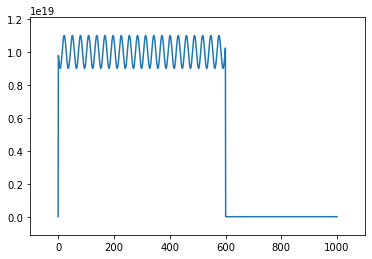

In [4]:
T = 1000
N = 1000
def G(t,t0=0.6*T):
    if t<t0 and t>0: return 1e19*(1+.1*sin(50*t))
    else: return 0

t = np.linspace(0,T,N)
g = np.array([G(i) for i in t])
plot(t,g)
margins(.1)

0.3375
0.007407407407407409


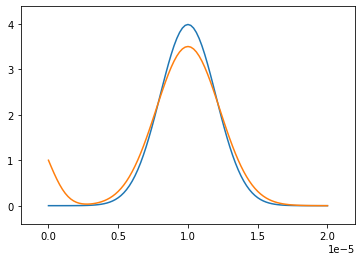

In [6]:
b3 = 2
u0 = 1
f0 = 1e-11
PLOT = 0
L = 20e-6
Nx = 100
T = 1e-2
Nt = 2000
D = 2.7e-9
# Initial profile function
I = lambda x: np.sin(np.pi*x) # sine
I = lambda x,mu=0.5,sgm = 0.1: 1/(sgm*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2 / (2*sgm**2)) # Gaussian
norm = 1

x = np.linspace(0, L, Nx+1)   # mesh points in space
t = np.linspace(0, T, Nt+1)    # mesh points in time
dx = x[1] - x[0]
dt = t[1]-t[0]
F = D*dt/dx**2
print(F)
x = x/L
t = t*L**2/D
dx = x[1] - x[0]
dt = t[1]-t[0]
F = dt/dx**2
print(F)

u   = np.zeros(Nx+1)
u_1 = np.zeros(Nx+1)
# Data structures for the linear system
A = np.zeros((Nx+1, Nx+1))
b = np.zeros(Nx+1)
for i in range(1, Nx):
    A[i,i-1] = -F
    A[i,i+1] = -F
    A[i,i] = 1 + 2*F
if not b3: A[0,0] = A[Nx,Nx] = 1
if b3: A[0,0] = 1+F; A[0,1] = -F;A[Nx,Nx-1] = -F; A[Nx,Nx] = 1+F
if b3 == 2: A[0,0] = 1;A[0,1] = 0;A[Nx,Nx-1] =D*L/dx; A[Nx,Nx] = f0-D*L/dx

# Set initial condition u(x,0) = I(x)
for i in range(0, Nx+1):
    u_1[i] = I(x[i])
u_1 = u_1/norm
plt.plot(x*L,u_1*norm)
color_idx = np.linspace(0,1,Nt)
for n in range(0, Nt):
    # Compute b and solve linear system
    for i in range(1, Nx):
        b[i] = u_1[i]
    if not b3: b[0] = b[Nx] = 0
    if b3: b[0] = u_1[0]; b[Nx] = u_1[Nx]
    if b3==2: b[0] = u0; b[Nx] = 0
    u[:] = solve(A, b) # scipy.linalg.solve
    # Update u_1 before next step
    u_1, u = u, u_1
    if PLOT: plt.plot(x,u_1,color = plt.cm.jet(color_idx[n]))
plt.plot(x*L,u_1*norm)
margins(0.1)